### Install the latest bio-compose from PyPI:

In [1]:
!pip install --no-cache-dir -q bio-compose

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.8/219.8 kB 16.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 99.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 110.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 144.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 143.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 223.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 142.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 159.2 MB/s eta 0

### Import the simulation verifier:

In [4]:
import os
from pprint import pp

from google.colab import files

from bio_compose import __version__
from bio_compose.verifier import Verifier


f'Current version of bio-compose: {__version__}'

'Current version of bio-compose: 0.4.0'

### Instantiate a new ``Verifier``:

In [5]:
verifier = Verifier()

### Upload an entrypoint file to this Colab session:

In [6]:
print('Please upload SBML file for verification:')
files.upload()

print('Please optionally upload an expected-results results.h5 file:')
files.upload()

print(f'Current Colab session files: {os.listdir("/content")}')

Please upload SBML file for verification:


Saving BIOMD0000000001_url.xml to BIOMD0000000001_url.xml
Please optionally upload an expected-results results.h5 file:


Current Colab session files: ['.config', 'BIOMD0000000001_url.xml', 'sample_data']


### Define sbml verification submission (query) parameters (Uniform Time Course) for BioModel 0001:

In [8]:
# model io parameters
sbml_filepath = '/content/BIOMD0000000001_url.xml'

# "time" parameters
start_time = 0  # 'start'
end_time = 100  # 'end'
n_steps = 1000  # 'steps'

# comparison parameters
rtol = None  # if this parameter is omitted from the submission, its default value is 1e-4
atol = 1e-08  # here we are using the defaults used by np.allclose as an example of custom tolerances. Otherwise, max(1e-3, max1 * 1e-5, max2 * 1e-5) where max1 is the max() of the given piecewise arrays.

### (Optional): Get compatible simulators for the given model:

In [9]:
simulators = verifier.get_compatible(file=sbml_filepath, versions=False)
simulators.sort()

simulators

['amici', 'copasi', 'tellurium']

### Use the Verifier instance to submit a new simulation verification to the server using aforementioned query parameters:

In [10]:
submission = verifier.verify_sbml(
    entrypoint=sbml_filepath,
    start=start_time,
    end=end_time,
    steps=n_steps,
    simulators=simulators,
    rTol=rtol,
    aTol=atol,
    # selection_list=['<ANY SIMULATION OBSERVABLE NAME>']  <-- optionally you can include specific observables in the verification, otherwise include all matching observables.
)

In [31]:
# the verification's status/data can be fetched using the 'job_id' field from the output of the previous cell (submission):

job_id = submission['job_id']
# job_id = 'verification-bio_check-request-b55e621c-07ee-4d25-9f1c-00f048abeadc-9642f155-dfbf-4cbe-89d8-b15c7d6993d8'

submission

{'job_id': 'verification-bio_check-request-b55e621c-07ee-4d25-9f1c-00f048abeadc-9642f155-dfbf-4cbe-89d8-b15c7d6993d8',
 'status': 'PENDING',
 'timestamp': '2024-08-29 20:03:40.327802',
 'comparison_id': 'bio_check-request-b55e621c-07ee-4d25-9f1c-00f048abeadc',
 'path': 'file_uploads/verification-bio_check-request-b55e621c-07ee-4d25-9f1c-00f048abeadc-9642f155-dfbf-4cbe-89d8-b15c7d6993d8/BIOMD0000000001_url.xml',
 'start': 0,
 'end': 100,
 'steps': 1000,
 'simulators': ['amici', 'copasi', 'tellurium'],
 'expected_results': None,
 'include_output': True,
 'rTol': None,
 'aTol': 1e-08,
 'selection_list': None}

### Use the get_output method of Verifier to poll the API for results:

In [13]:
verification_result = verifier.get_output(job_id)

verification_result['content']['results'].keys()

dict_keys(['results', 'rmse'])

### Showing a sample output observable proximity comparison:

In [14]:
sample_observable = 'BasalACh2'
sample_verification_result = verification_result['content']['results']['results'][sample_observable]
sample_proximity_matrix = sample_verification_result['proximity']

sample_proximity_matrix

{'amici': {'amici': True, 'copasi': True, 'tellurium': False},
 'copasi': {'amici': True, 'copasi': True, 'tellurium': False},
 'tellurium': {'amici': False, 'copasi': False, 'tellurium': True}}

### Use the verifier's export_csv method to export the ouput data on which the verification is calculated (from each simulator):

In [17]:
output_dir = os.path.dirname(sbml_filepath)
model_name = verification_result['content']['source'].replace('xml', 'csv')
csv_name = os.path.join(output_dir, model_name)

verifier.export_csv(data=verification_result, save_dest=csv_name, simulators=simulators)

### CSV is saved to the specified destination:

In [20]:
!ls /content | grep csv

BIOMD0000000001_url.csv


### ``Verifier`` also allows the reading of previously generated observables:

In [22]:
observables_df = verifier.read_observables(csv_name)

observables_df

,BasalACh2_amici,BasalACh2_copasi,BasalACh2_tellurium,IntermediateACh_amici,IntermediateACh_copasi,IntermediateACh_tellurium,ActiveACh_amici,ActiveACh_copasi,ActiveACh_tellurium,Active_amici,...,IntermediateACh2_tellurium,DesensitisedACh_amici,DesensitisedACh_copasi,DesensitisedACh_tellurium,Intermediate_amici,Intermediate_copasi,Intermediate_tellurium,ActiveACh2_amici,ActiveACh2_copasi,ActiveACh2_tellurium
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,7.691286e-08,7.691288e-08,3.259123e-06,1.007080e-05,1.007080e-05,3.259123e-06,3.259133e-06,3.259134e-06,3.259123e-06,3.259133e-06,...,3.259123e-06,1.549006e-10,1.549006e-10,3.259123e-06,7.246026e-11,7.246025e-11,3.259123e-06,3.259133e-06,3.259134e-06,3.259123e-06
2,3.521841e-08,3.521850e-08,1.497125e-06,1.349345e-05,1.349344e-05,1.497125e-06,1.497137e-06,1.497141e-06,1.497125e-06,1.497137e-06,...,1.497125e-06,4.774251e-10,4.774253e-10,1.497125e-06,9.623627e-11,9.623621e-11,1.497125e-06,1.497137e-06,1.497141e-06,1.497125e-06
3,2.129838e-08,2.129845e-08,9.088576e-07,1.458558e-05,1.458558e-05,9.088576e-07,9.088536e-07,9.088565e-07,9.088576e-07,9.088536e-07,...,9.088576e-07,8.545181e-10,8.545182e-10,9.088576e-07,1.038153e-10,1.038152e-10,9.088576e-07,9.088536e-07,9.088565e-07,9.088576e-07
4,1.662165e-08,1.662170e-08,7.111883e-07,1.490237e-05,1.490237e-05,7.111883e-07,7.111799e-07,7.111819e-07,7.111883e-07,7.111799e-07,...,7.111883e-07,1.248491e-09,1.248491e-09,7.111883e-07,1.060057e-10,1.060056e-10,7.111883e-07,7.111799e-07,7.111819e-07,7.111883e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,3.843876e-248,-7.744273e-27,-5.707273e-40,8.501641e-244,-1.707869e-22,-5.707273e-40,2.525536e-246,-5.088121e-25,-5.707273e-40,2.525536e-246,...,-5.707273e-40,2.859949e-141,-2.940607e-16,-5.707273e-40,4.838494e-09,4.838492e-09,-5.707273e-40,2.525536e-246,-5.088121e-25,-5.707273e-40
997,2.040896e-248,-7.282924e-27,-5.598485e-40,4.513241e-244,-1.606126e-22,-5.598485e-40,1.340925e-246,-4.785007e-25,-5.598485e-40,1.340925e-246,...,-5.598485e-40,1.935094e-141,-2.792534e-16,-5.598485e-40,4.838432e-09,4.838431e-09,-5.598485e-40,1.340925e-246,-4.785007e-25,-5.598485e-40
998,1.043402e-248,-6.813887e-27,-5.486482e-40,2.307369e-244,-1.502688e-22,-5.486482e-40,6.855444e-247,-4.476842e-25,-5.486482e-40,6.855444e-247,...,-5.486482e-40,1.309320e-141,-2.641974e-16,-5.486482e-40,4.838371e-09,4.838370e-09,-5.486482e-40,6.855444e-247,-4.476842e-25,-5.486482e-40
999,5.124101e-249,-6.337120e-27,-5.371243e-40,1.133295e-244,-1.397545e-22,-5.371243e-40,3.366680e-247,-4.163598e-25,-5.371243e-40,3.366680e-247,...,-5.371243e-40,8.859100e-142,-2.488913e-16,-5.371243e-40,4.838309e-09,4.838308e-09,-5.371243e-40,3.366680e-247,-4.163598e-25,-5.371243e-40


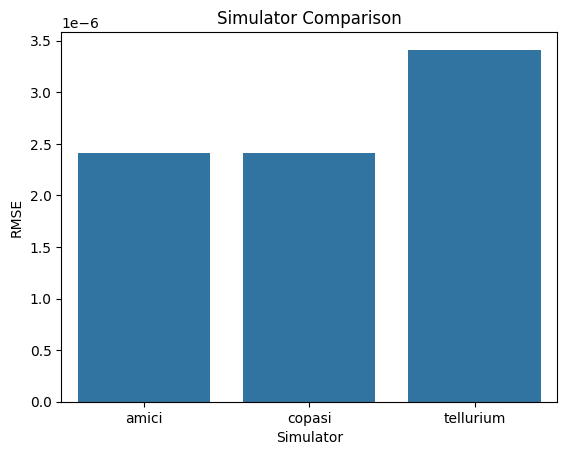

In [24]:
# visualize multiple aspects of the verification result including: observables data, mean square error for each observable (for each simulator)...
    # ...or in this case, RMSE results for each simulator accross all observables

plot = verifier.visualize_rmse(verification_result)